# Question: What is the actual dimensionality of emotions

In [1]:
import numpy as np
from nltools.data import Adjacency
import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.style
import matplotlib as mpl
mpl.style.use('bmh')

//anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
emotions = ['Afraid', 'Amused', 'Angry', 'Anxious', 'Bored', 'Disgusted',
       'Frustrated', 'Happy', 'Hopeful', 'Inspired', 'Moved', 'Proud',
       'Relieved', 'Sad', 'Surprised', 'Uncomfortable']

In [3]:
# Getting NAN error so dropping all NA's for now
# (will only have scan data and a few mturk participants)
p_emo_summary = pd.DataFrame()

for emo in emotions: 
    df = pd.DataFrame()

    for stim in range(108,116): 
        df_add = pd.read_csv('./cf_data/stim-%s_emo-%s_dilation-60.csv' % (stim, emo), index_col=0).drop('Emotion', axis=1)
        df_add = df_add.sub(df_add.mean(axis=1), axis=0) #Demean data
        df = pd.concat([df, df_add], axis=1, sort=False) #Concat
        
    df.dropna(inplace=True)
    p_emo_summary = p_emo_summary.append(df)


In [4]:
n_component_count = []

for participant in list(set(p_emo_summary.index.values)): 
    p = p_emo_summary.loc[participant,:]
    p.index = emotions
    pca = PCA(n_components = .90)
    pca.fit(p)
    cum_sum = pca.explained_variance_ratio_.cumsum()
    n_components = len(pca.explained_variance_ratio_.cumsum())
    n_component_count.append(n_components)

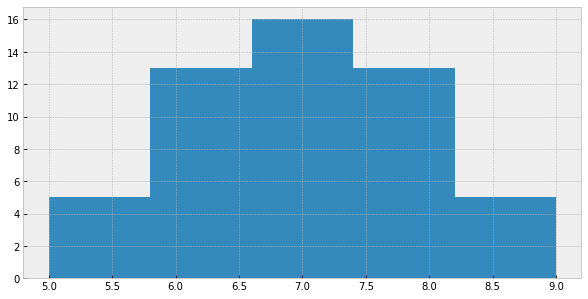

In [5]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))

plt.hist(n_component_count, bins=5);